<h1 style="text-align:center">Build and Evaluate Time Series Models</h1>
<h2 style="text-align:center">Crime Classification- Tree Model 2
</h2>
<p style="text-align:center">Robert Evans</p>
<p style="text-align:center">School of Technology & Engineering, National University</p>
<p style="text-align:center">DDS-8555: Predictive Analysis</p>
<p style="text-align:center">Dr. Mohammad Yavarimanesh</p>
<p style="text-align:center">March 2, 2025</p>

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Load Data

In [2]:
kaggle = False

if kaggle:
    path = ""
else:
    path = "Week8_Data_Crime"

train_df = pd.read_csv(f"{path}/train.csv.zip", parse_dates= ['Dates'])
test_df = pd.read_csv(f"{path}/test.csv.zip", parse_dates= ['Dates'])

In [3]:
train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
test_df.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


## Prepare Data

In [5]:
cols = ['DayOfWeek', 'X', 'Y']
target = 'Category'

In [6]:
X = train_df[cols]
y = train_df[target]

In [7]:
# Encode categorical variables
label_encoders = {}
for col in ['DayOfWeek']:  # Only encode categorical columns
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store encoders for later use

# Encode the target variable
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

C:\Users\rober\AppData\Local\Temp\ipykernel_54240\935991679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


In [8]:
# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

In [9]:
# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluate the model

In [10]:
# Evaluate the model
y_pred = clf.predict(X_test)

In [11]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print evaluation metrics
print(f"Model Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Model Evaluation Metrics:
Accuracy:  0.2633
Precision: 0.2253
Recall:    0.2633
F1-score:  0.2323


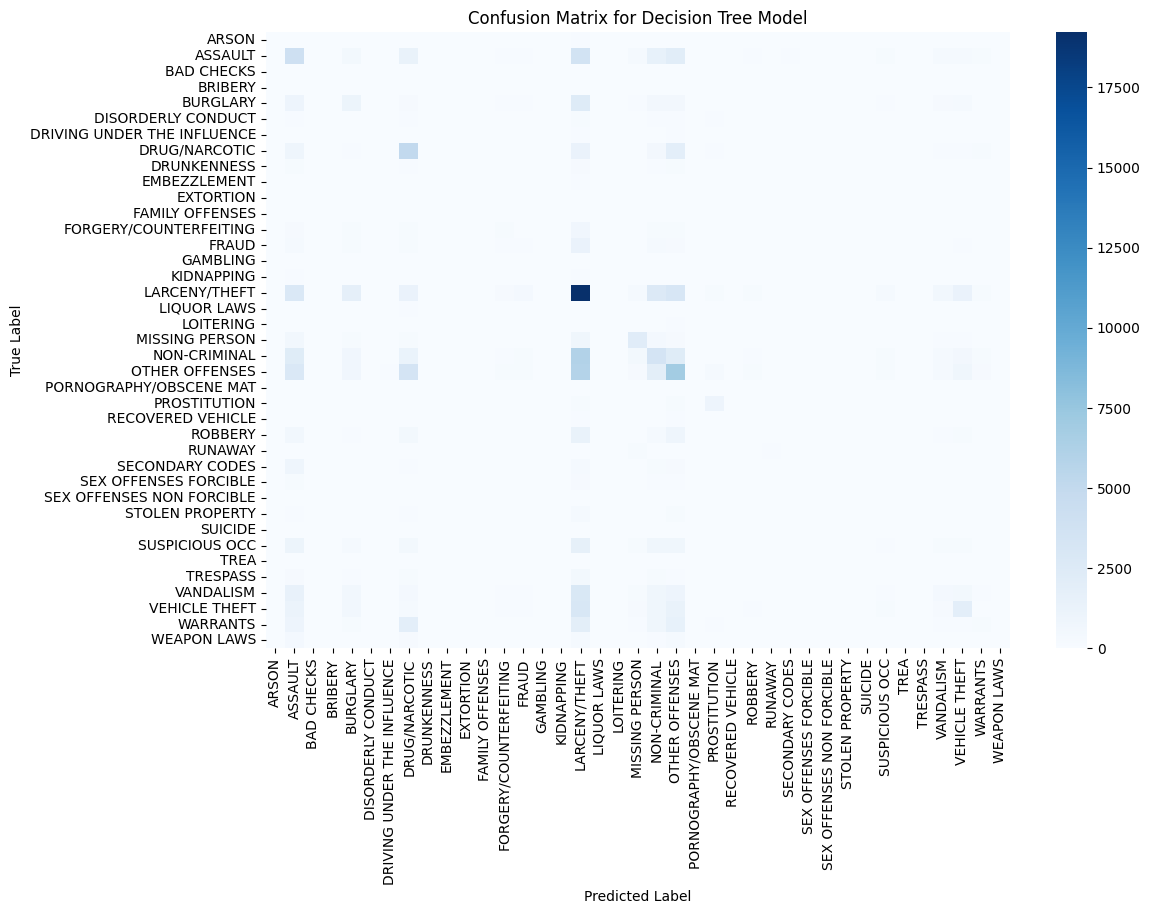

In [12]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert to DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=y_encoder.classes_, columns=y_encoder.classes_)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_df, annot=False, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()

## Kaggle

In [13]:
# Encode the test features using the same label encoders
X_test_final = test_df[cols].copy()
X_test_final['DayOfWeek'] = label_encoders['DayOfWeek'].transform(X_test_final['DayOfWeek'])

In [14]:
# Predict categories for test data
test_pred = clf.predict(X_test_final)

In [15]:
# Convert predicted labels back to original categories
test_pred_labels = y_encoder.inverse_transform(test_pred)

In [16]:
# Create the submission format with crime categories as column headers
categories = y_encoder.classes_  # Get unique category names
output_df = pd.DataFrame({'Id': test_df['Id']})

In [17]:
# Create a binary matrix for predictions
for category in categories:
    output_df[category] = (test_pred_labels == category).astype(int)

In [18]:
# Save the formatted predictions to CSV
output_df.to_csv("crime_2.csv", index=False)

print("Predictions saved to crime_2.csv")

Predictions saved to crime_2.csv
